<a href="https://colab.research.google.com/github/prasaddaddhala/Bharat_Intern/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import zipfile
import pandas as pd

In [79]:
zip_file="/content/titanic.zip"
with zipfile.ZipFile(zip_file,"r") as zip_ref:
  zip_ref.extractall("folder")

**gender_submission**

In [80]:
df=pd.read_csv("/content/folder/gender_submission.csv",encoding='latin-1')
df.head(100)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [82]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


**test data**

In [83]:
df2=pd.read_csv("/content/folder/test.csv",encoding='latin-1')
df2.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


**train data**

In [84]:
df3=pd.read_csv("/content/folder/train.csv",encoding='latin-1')
df3.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df3['Age'].fillna(df3['Age'].median(), inplace=True)
df3['Embarked'].fillna(df3['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df3['Sex'] = df3['Sex'].map({'male': 0, 'female': 1})
df3 = pd.get_dummies(df3, columns=['Embarked'], drop_first=True)

# Create a new feature 'FamilySize' combining 'SibSp' and 'Parch'
df3['FamilySize'] = df3['SibSp'] + df3['Parch'] + 1

In [87]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
X = df3[features]
y = df3['Survived']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [90]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [91]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [92]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[89 16]
 [19 55]]


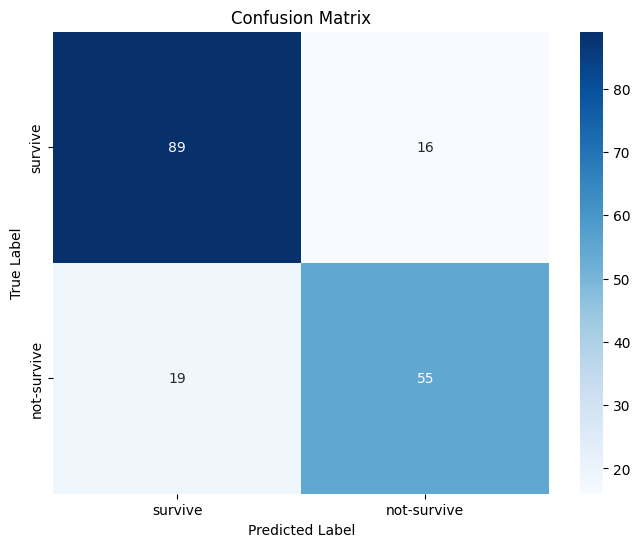

In [93]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['survive', 'not-survive'], yticklabels=['survive', 'not-survive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [94]:
t=y_train.value_counts()
t

0    444
1    268
Name: Survived, dtype: int64

In [95]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Distribution of Predicted Classes')

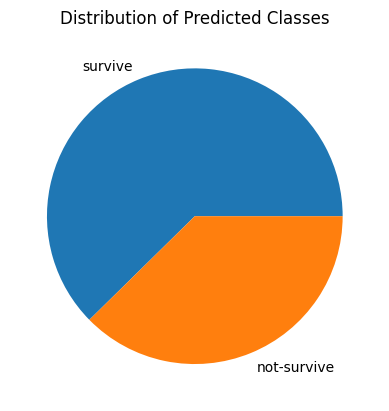

In [96]:
plt.pie(t,labels=['survive', 'not-survive'])
plt.title('Distribution of Predicted Classes')

In [97]:
def preprocess_input(pclass, sex, age, sibsp, parch, fare):

    user_data = pd.DataFrame({'Pclass': [pclass],
                              'Sex': [sex],
                              'Age': [age],
                              'SibSp': [sibsp],
                              'Parch': [parch],
                              'Fare': [fare],
                              'FamilySize': [sibsp + parch + 1]})

    user_data['Sex'] = user_data['Sex'].map({'male': 0, 'female': 1})

    return user_data[features]

def predict_survival(model, input_data):
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)[0][1]
    return prediction, probability


pclass = int(input("Enter passenger class (1, 2, or 3): "))
sex = input("Enter sex (male or female): ")
age = float(input("Enter age: "))
sibsp = int(input("Enter number of siblings/spouses aboard: "))
parch = int(input("Enter number of parents/children aboard: "))
fare = float(input("Enter fare: "))


user_input = preprocess_input(pclass, sex, age, sibsp, parch, fare)


prediction, probability = predict_survival(model, user_input)

print(f"\nPrediction: {'Survived' if prediction == 1 else 'Not Survived'}")
print(f"Probability of Survival: {probability:.4f}")

Enter passenger class (1, 2, or 3): 2
Enter sex (male or female): female
Enter age: 25
Enter number of siblings/spouses aboard: 1
Enter number of parents/children aboard: 1
Enter fare: 9.83

Prediction: Survived
Probability of Survival: 0.7043


<BarContainer object of 2 artists>

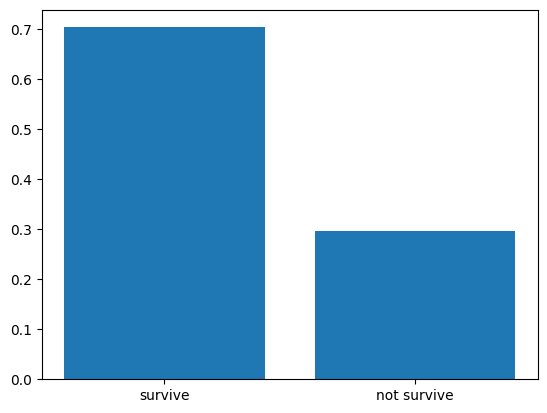

In [98]:
plt.bar(['survive','not survive' ],[probability,1-probability])